In [12]:
import numpy as np #importing libraries
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.axes as axis

In [13]:
def normalize(fold_data,icount_data):                              #creating function for normalizing folded pulse data
    
    norm_data = np.zeros_like(fold_data)                           #initializing array for normalized data
    
    for i in range(len(fold_data[:,:,:])):                         #looping over how ever many itterations within the folded data necessary to fill norm_data
        norm_data[:,:,:,i] = fold_data[:,:,:,i]/icount_data[:,:,:] #normalizing data
    
    return norm_data

In [14]:
def new_norm(fold_data,icount_data):                  #creating function for normalizing folded pulse data
    
    norm_data = np.zeros_like(icount_data)            #initializing array for normalized data
    norm_data = fold_data[:,:,:,0]/icount_data[:,:,:] #normalizing data
    
    return norm_data

In [15]:
def plotting(folded_data, norm_data,j,plot_size):
    for i in range(len(folded_data)):                             #itterating over time values in data file
        plt.figure(figsize=(plot_size,plot_size))                 #creating figure
        plt.imshow(norm_data[i,:,:],cmap='viridis',aspect='auto') #plotting data
        plt.yticks(range(0,32768,500))                            #setting additional 'ticks' on y axis such that it is easier to erad off frequency bands
        plt.colorbar()                                            #showing colour band
        plt.xlabel('Phase', size='20')                            #setting plot labels
        plt.ylabel('Frequency', size='20')
        plt.savefig('Figure_'+str(j)+'.'+str(i)+'.png')           #saving plot

In [16]:
def mask_bands(data):
    i = 0                                     #initializing variables to loop over
    l = 0
    m = 0
    for h in range(len(data[:,0,0])):         #for each entry of time
        for k in range(len(data[0,0,:])):     #for each entry of phase
            for j in range(len(data[0,:,0])): #for each entry of frequency
                if (i >= 10500 and i <= 11700) or (i >= 13500 and i <= 14000) or (i >= 15000 and i <= 15500): #conditional for noisy frequency bands
                    data[m,i,l] = 0           #weighing down the RFI frequencies
                    i = i+1
                else:
                    i = i+1
            i=0
            l=l+1
        i=0
        l=0
        m = m+1
    return data

def mask_bands_specific(data,low_1,high_1,low_2,high_2,low_3,high_3):
    i = 0                                     #initializing variables to loop over
    l = 0
    m = 0
    for h in range(len(data[:,0,0])):         #for each entry of time
        for k in range(len(data[0,0,:])):     #for each entry of phase
            for j in range(len(data[0,:,0])): #for each entry of frequency
                if (i >= low_1 and i <= high_1) or (i >= low_2 and i <= high_2) or (i >= low_3 and i <= high_3): #conditional for noisy frequency bands
                    data[m,i,l] = 0           #weighing down the RFI frequencies
                    i = i+1
                else:
                    i = i+1
            i=0
            l=l+1
        i=0
        l=0
        m = m+1
    return data

In [17]:
def average(norm_data):
    # averaged_data[axis=(1)] = norm_data[axis=(1)]/avg[axis=(1)]
    return (norm_data/np.mean(norm_data,axis=(0,2),keepdims=True)) #taking the average of the time and phase axis for the normalized data, and dividing the normalized data by the resuling array

In [18]:
start = "arochime-invpfbB0329+54_32768chan3ntbin" #setting strings to make calling files easier/shorter, since most of them share the same name
fold = "foldspec_2018-08-16T10:"
icount = "icount_2018-08-16T10:"
end = ".000+30.000000000000004sec"
    
data1 = np.load(start+fold+str(38)+":"+str(30)+end+".npy")
data2 = np.load(start+icount+str(38)+":"+str(30)+end+".npy")

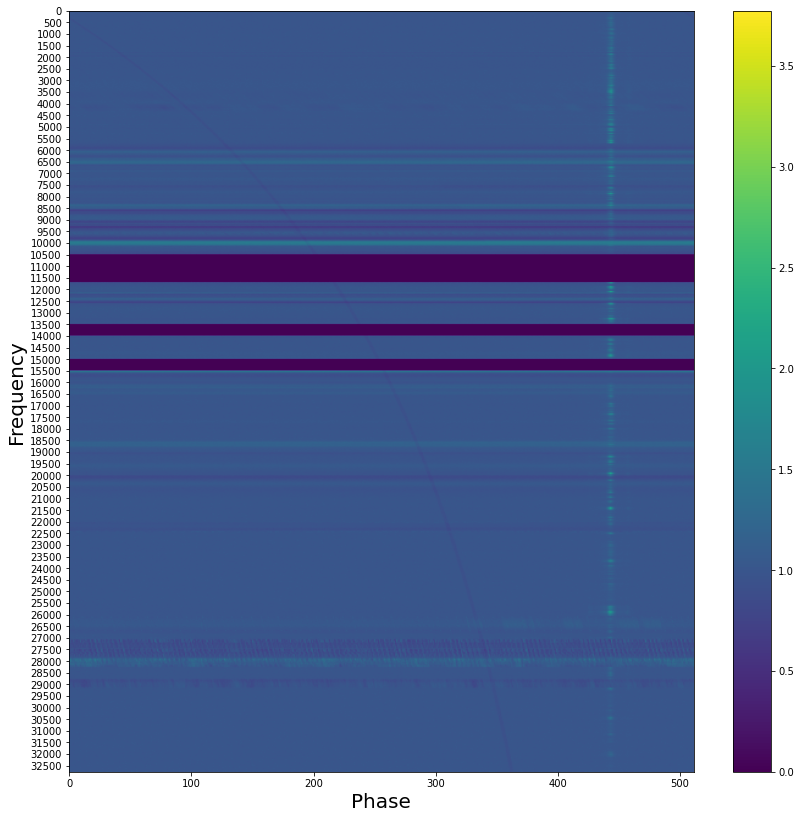

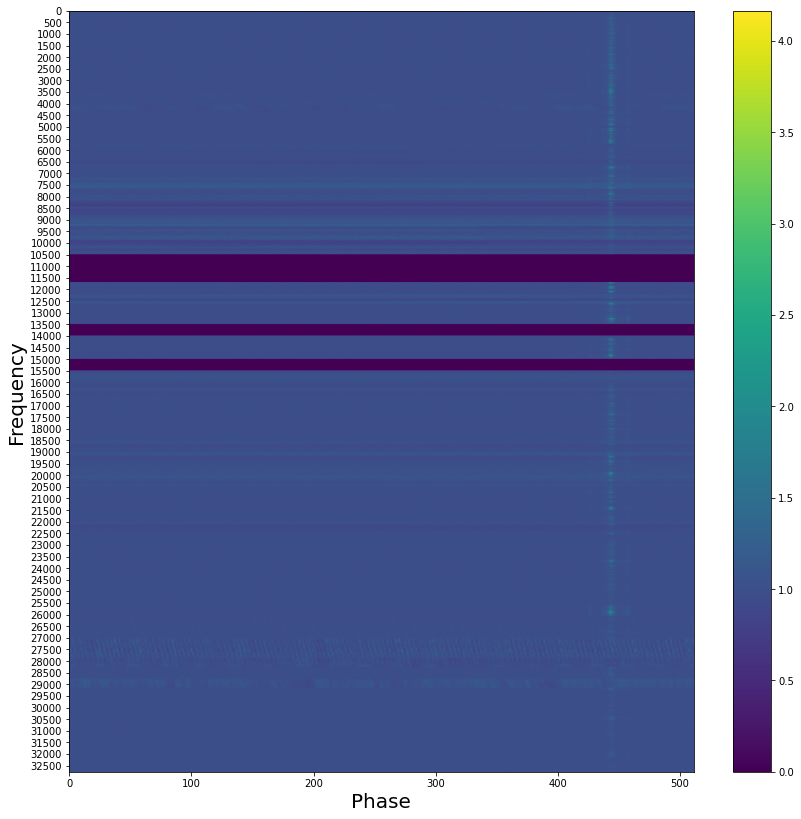

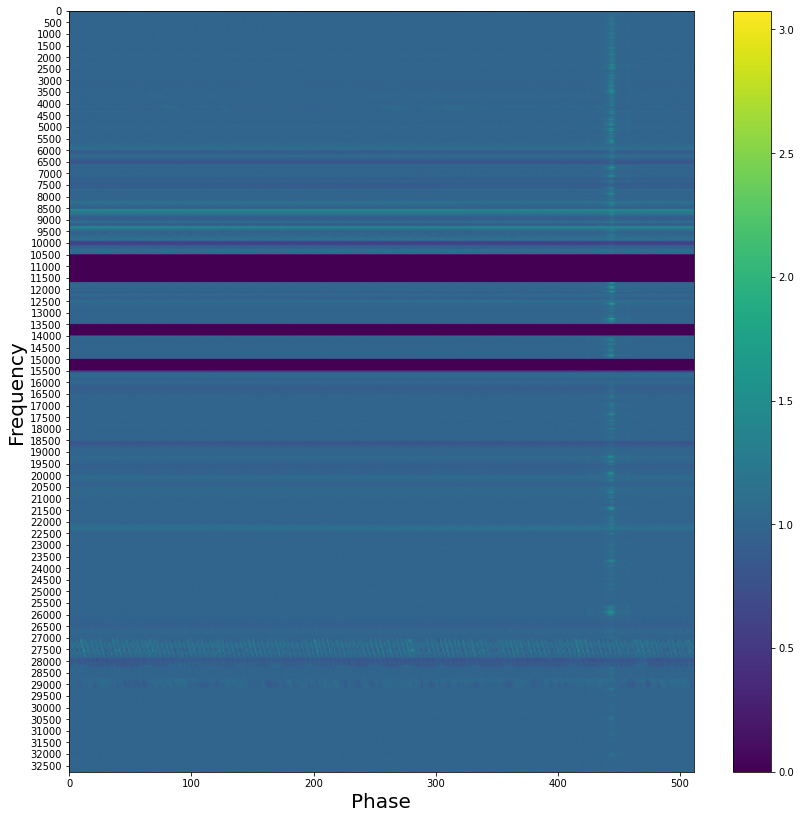

In [19]:
data_fold_1 = np.load(start+fold+str(47)+":"+str(30)+end+".npy")    #loading data from folded pulses
data_count_1 = np.load(start+icount+str(47)+":"+str(30)+end+".npy") #loading data from icount file
norm_data_1 = new_norm(data_fold_1,data_count_1)                    #normalizing data
avg_data = average(norm_data_1)                                     #dividing normalized data by time and phase averaged array
masked_data = mask_bands(avg_data)                                  #weighing down RFI frequencies
plotting(data_fold_1,masked_data,2,14)